<a href="https://colab.research.google.com/github/lamaliang/2022_IPCS/blob/main/01_Read_TCCIP_using_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import xarray as xr
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from google.colab import drive
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [43]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
ifn = '/content/gdrive/MyDrive/Colab_Notebooks/2022_IPCS/data/tccip/mon/tavg/5km/tavg.1960-2018.monthly.5km-grid-v4.nc'
ds = xr.open_dataset(ifn,decode_times=False)

In [45]:
time = pd.date_range(start='1960-01-01', end='2018-12-01', freq='MS')
ds.coords['time'] = time
# choose single point 
dtc = ds.tas.sel(lat=25.1,lon=121.31,method='nearest')
# calculus the annual mena
val_yr = dtc.groupby('time.year').mean(dim='time')
# calculus climatology
val_clm = dtc.mean()

In [46]:
# calculus anomaly
val_anom = (val_yr - val_clm).to_dataframe()

# calculus 5 years running mean 
val_runave = (val_yr - val_clm).rolling(year=5, center=True).mean().to_dataframe()

In [47]:
# plot anomaly using bar plot
fig = px.bar(val_anom,x=val_anom.index,y='tas',color='tas')
fig.show()

In [48]:
# add title 
fig = px.bar(val_anom,x=val_anom.index,y='tas',color='tas',title='TCCIP/5km Taipei Tavg')
fig.show()

In [49]:
# check data frame index 
val_anom.index

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018],
           dtype='int64', name='year')

In [50]:
# method 1 plot overlay : 
fig = px.line(val_runave, x=val_runave.index,y='tas',color=px.Constant('runave'))
fig.add_bar(x=val_anom.index,y=val_anom.tas,name='anomaly')
fig.show()

In [51]:
# method 2 of plot overlay
fig = go.Figure()
fig.add_trace(go.Bar(x=val_anom.index,y=val_anom['tas'],
                     marker_color=val_anom['tas'],name='anomaly'))
fig.add_trace(go.Scatter(x=val_runave.index, y=val_runave['tas'], 
                         line=dict(color='red'), name='runave'))

In [52]:
# calculus linear regression and plot 
xval = val_yr.to_dataframe().index
yval = val_yr.values

slope, intercept, r, p, se = linregress(xval,yval)
slope, intercept, r, p, se

(0.01925108601376719,
 -16.07891945027942,
 0.716815209268604,
 1.712341137561797e-10,
 0.0024803178193421433)

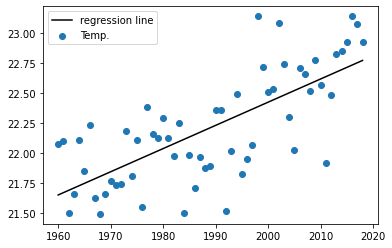

In [53]:
plt.scatter(xval,yval)
plt.plot(xval,intercept + slope*xval, 'k')
plt.legend(['regression line','Temp.'])